<a href="https://colab.research.google.com/github/LaizaCostaa/Case-An-lise-de-faturamento-Blog-x-Site/blob/main/Case_blogxsite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESUMO**

Este projeto foi desenvolvido para auxiliar a empresa X nas tomadas de decisões envolvendo o blog da marca.
O objetivo dessa análise é entender de que forma esse novo canal influencia na receita da empresa.

Para isso, por meio dessa análise exploratória, buscaremos:
- Detectar padrões e desvios nos dados;
- Identificar as variáveis mais relevantes e de que forma se relacionam entre si;
- Encontrar tendências e formular hipóteses;
- Realizar inferências estatísticas básicas;




**CONTEXTO**

Status:

*   A empresa já possui um site de vendas que funciona há um tempo;
*   A empresa criou um blog com conteúdo há aproximadamente 3 meses;

Perguntas iniciais:

*   Qual o impacto que o blog tem gerado na receita da empresa desde a sua criação? 
*   É possível saber se é viável para a empresa (em termos de receita) manter ou não o blog ativo?
*   Qual canal exerce maior impacto na receita? Blog? site? Os dois?

Base de dados a ser utilizada na resolução do problema:

* O número total de usuários do blog por dia;
* O número total de usuários do site por dia;
* O número total de transações do blog por dia;
* O número total de transações do site por dia;
* Receita diária 





In [ ]:
import pandas as pd

import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose




# ler o csv
df = pd.read_csv("psel - data.csv")
df.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,0,4693,0,46739
1,2019-01-02,867328,0,8501,0,83129
2,2019-01-03,758590,0,9375,0,86067
3,2019-01-04,688873,0,8405,0,69363
4,2019-01-05,441760,0,6136,0,56183


In [ ]:
# Converter a coluna de data em um índice de data
df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].apply(lambda s: datetime.date(s.year, s.month, 1))

df_group = df.groupby(['ano_mes'])['receita'].agg(['mean'])

In [ ]:
df_group.dtypes

mean    float64
dtype: object

In [ ]:
# Converter a coluna de data em um índice de data
df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].apply(lambda s: datetime.date(s.year, s.month, 1))

df_group = df.groupby(['ano_mes'])['receita'].agg(['mean'])
#df_group.set_index('ano_mes', inplace=True)

# Mudando a tipagem do index
df_group.index = pd.to_datetime(df_group.index)

# Decompor a série temporal em suas componentes tendência, sazonalidade e ruído
# result = seasonal_decompose(df_group['mean'], model='multiplicative')

# Plotar a tendência
'''
plt.plot(result.seasonal)
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Tendência das Vendas")
plt.show()
'''

'\nplt.plot(result.seasonal)\nplt.xlabel("Data")\nplt.ylabel("Vendas")\nplt.title("Tendência das Vendas")\nplt.show()\n'

In [ ]:
def show_info(data):
  print('DATASET SHAPE: ', data.shape, '\n')
  print('-'*50)
  print('FEATURE DATA TYPES:')
  print(data.info())
  print('\n', '-'*50)
  print('NUMBER OF UNIQUE VALUES PER FEATURE: ', '\n')
  print(data.nunique())
  print('\n', '-'*50) 
  print('NULL VALUES PER FEATURE')
  print(data.isnull().sum())

show_info(df)

DATASET SHAPE:  (639, 7) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             639 non-null    datetime64[ns]
 1   receita          639 non-null    int64         
 2   transacoes_blog  639 non-null    int64         
 3   transacoes_site  639 non-null    int64         
 4   usuarios_blog    639 non-null    int64         
 5   usuarios_site    639 non-null    int64         
 6   ano_mes          639 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 35.1+ KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE:  

data               639
receita            639
transacoes_blog    122
transacoes_site    633
usuarios_blog      123
usuarios_site      636
ano_mes        

In [ ]:
df.describe()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,6.390000e+02,639.000000,639.000000,639.000000,639.000000
mean,1.623891e+06,528.350548,19039.140845,1439.848200,101610.485133
std,1.160581e+06,1201.781347,13677.729723,3369.872063,37240.234152
min,3.208500e+04,0.000000,3557.000000,0.000000,26298.000000
25%,8.073420e+05,0.000000,11013.000000,0.000000,77727.000000
50%,1.263161e+06,0.000000,16069.000000,0.000000,96104.000000
75%,2.232770e+06,0.000000,22606.500000,0.000000,117586.500000
max,1.226684e+07,5586.000000,188955.000000,13059.000000,369989.000000


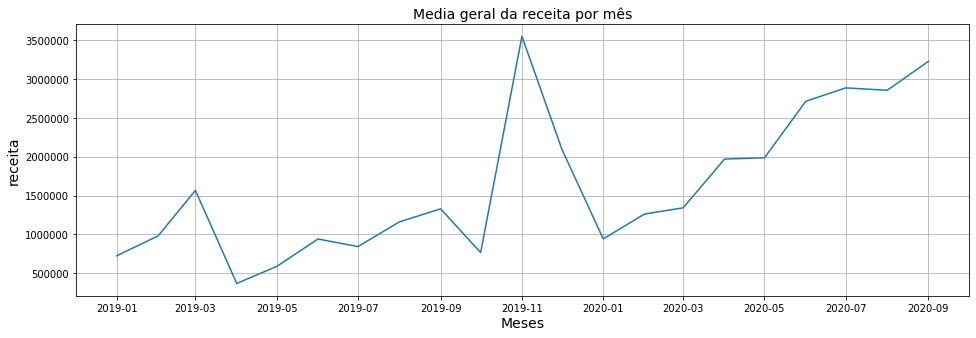

In [ ]:
#Calculando a média geral da receita por mês

df['data'] = pd.to_datetime(df['data'])
df['ano_mes'] = df['data'].apply(lambda s: datetime.date(s.year, s.month, 1))
df_group = df.groupby(['ano_mes'])['receita'].agg(['mean'])

plt.figure(figsize=(16,5))
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Media geral da receita por mês', fontsize = 14)
plt.xlabel('Meses', fontsize = 14)
plt.ylabel('receita', fontsize = 14)
plt.plot(df_group)

# **TRATAMENTO DE OUTLIERS**

Identificando os outliers

In [ ]:
from scipy import stats
#Definindo os percentis
p75, p50 = np.percentile(df['receita'], [75, 50])
print('Percentil 75: ',p75 )
print('Percentil 50: ',p50 )

Percentil 75:  2232769.5
Percentil 50:  1263161.0


In [ ]:
#Encontrando os quartis 1 e 3
Q1, Q3 = np.percentile(df['receita'] , [25, 75])
print('Primeiro Quartil ou Percentil 25: ',Q1)
print('Terceito Quartil ou Percentil 75: ',Q3)


Primeiro Quartil ou Percentil 25:  807342.0
Terceito Quartil ou Percentil 75:  2232769.5


In [ ]:
#Encontrando a amplitude interquartil
Amp_interquartil = Q3 - Q1
print(Amp_interquartil)

1425427.5


In [ ]:
#Encontrando os limites dos outliers
limite_inferior = Q1 - (1.5 * Amp_interquartil)
limite_superior = Q3 + (1.5 * Amp_interquartil)

print('Limite Inferior: ', limite_inferior)
print('Limite Superior: ', limite_superior)

Limite Inferior:  -1330799.25
Limite Superior:  4370910.75


In [ ]:
#Remoção dos outliers

df_sem_outlier = df.loc[(df['receita'] <= 4370910.75) & (df['receita'] >= 1330799.25)]




In [ ]:
#Validando a remoção dos outliers

df_sem_outlier.describe()

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,2.930000e+02,293.000000,293.000000,293.000000,293.000000
mean,2.379063e+06,1095.430034,25342.197952,2946.365188,119360.535836
std,7.270720e+05,1539.502926,10067.504558,4291.598732,32951.538736
min,1.331277e+06,0.000000,10159.000000,0.000000,59357.000000
25%,1.775681e+06,0.000000,18306.000000,0.000000,97003.000000
50%,2.251973e+06,0.000000,22565.000000,0.000000,112932.000000
75%,2.889479e+06,2222.000000,30311.000000,5908.000000,136374.000000
max,4.365090e+06,5586.000000,67296.000000,13059.000000,230227.000000


<ipython-input-17-dad90ce28269>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outlier['ano_mes'] = df_sem_outlier['data'].apply(lambda s: datetime.date(s.year, s.month, 1))


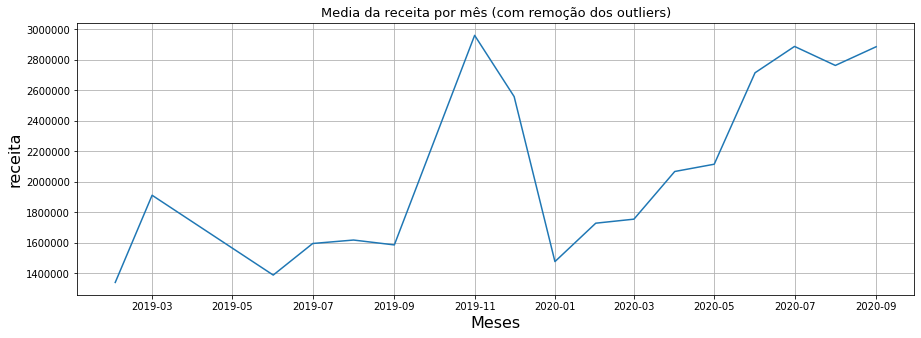

In [ ]:
#df_sem_outlier['data'] = pd.to_datetime(df['data'])
df_sem_outlier['ano_mes'] = df_sem_outlier['data'].apply(lambda s: datetime.date(s.year, s.month, 1))



df_sem_outlier_group = df_sem_outlier.groupby(['ano_mes'])['receita'].agg(['mean'])

plt.figure(figsize=(15,5))
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Media da receita por mês (com remoção dos outliers)', fontsize = 13)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)
plt.plot(df_sem_outlier_group)
plt.show()


**DIVISÃO DO DATA FRAME EM: PERÍODO ANTES DO BLOG X PERÍODO DEPOIS DO BLOG**




**1. Receita do período antes do blog**

In [ ]:
# definir a data de lançamento do blog
launch_date = pd.Timestamp("2020-06-01")


# dividir o data frame em dois
df_antes_blog = df_sem_outlier[df_sem_outlier['data'] < launch_date]
df_antes_blog

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,ano_mes
44,2019-02-14,1340918,0,12798,0,96579,2019-02-01
59,2019-03-01,1689589,0,15577,0,97690,2019-03-01
64,2019-03-06,1688251,0,16212,0,105136,2019-03-01
65,2019-03-07,1877771,0,17793,0,108032,2019-03-01
66,2019-03-08,2453247,0,24376,0,109411,2019-03-01
...,...,...,...,...,...,...,...
512,2020-05-27,2944816,0,32761,0,141234,2020-05-01
513,2020-05-28,2666364,0,31111,0,144696,2020-05-01
514,2020-05-29,2694096,0,32421,0,122685,2020-05-01
515,2020-05-30,2215956,0,25632,0,112932,2020-05-01


Text(0, 0.5, 'receita')

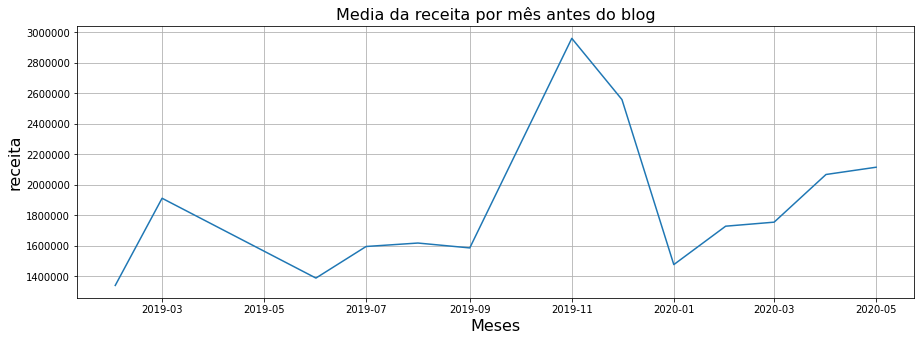

In [ ]:
#plotando a receita no perído antes do blog
plt.figure(figsize=(15,5))
plt.plot(df_antes_blog.groupby(['ano_mes'])['receita'].agg(['mean']))

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Media da receita por mês antes do blog', fontsize = 16)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)

**Comportamento da receita do site antes do blog:**

*   No período de 05/19, o site estava apresentando uma queda;
*   Entre os messes 09 e 11, o site apresentou um pico de crescimento (blackfriday?)
*   Houve uma queda na receita no mês de dezembro
*   Em janeiro de 2020, a receita começou a subir até o mes de maio


In [ ]:
"""#plotando a receita sem o blog
plt.figure(figsize=(15,5))
plt.plot(df_sem_outlier_site.groupby(['ano_mes'])['receita'].agg(['mean']))

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Media da receita por mês (site)', fontsize = 16)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)"""

"#plotando a receita sem o blog\nplt.figure(figsize=(15,5))\nplt.plot(df_sem_outlier_site.groupby(['ano_mes'])['receita'].agg(['mean']))\n\nplt.ticklabel_format(style='plain', axis='y')\nplt.grid()\nplt.title('Media da receita por mês (site)', fontsize = 16)\nplt.xlabel('Meses', fontsize = 16)\nplt.ylabel('receita', fontsize = 16)"

**2. Receita do período depois do blog**

In [ ]:
# definir a data de lançamento do blog
launch_date = pd.Timestamp("2020-06-01")

# data frame do período depois do blog
df_depois_blog = df_sem_outlier[df_sem_outlier['data'] >= launch_date]
df_depois_blog

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,ano_mes
517,2020-06-01,2166784,301,29095,856,131209,2020-06-01
518,2020-06-02,2325207,458,31840,697,157032,2020-06-01
519,2020-06-03,2689781,435,33739,521,142649,2020-06-01
520,2020-06-04,2458059,599,33464,1449,153545,2020-06-01
521,2020-06-05,2461542,870,28136,1066,136153,2020-06-01
...,...,...,...,...,...,...,...
632,2020-09-24,3648743,2379,22807,11700,130853,2020-09-01
633,2020-09-25,3320034,1996,21578,10082,112163,2020-09-01
634,2020-09-26,2509687,1580,15320,9292,96178,2020-09-01
635,2020-09-27,2182679,1838,14135,10052,103494,2020-09-01


Text(0, 0.5, 'receita')

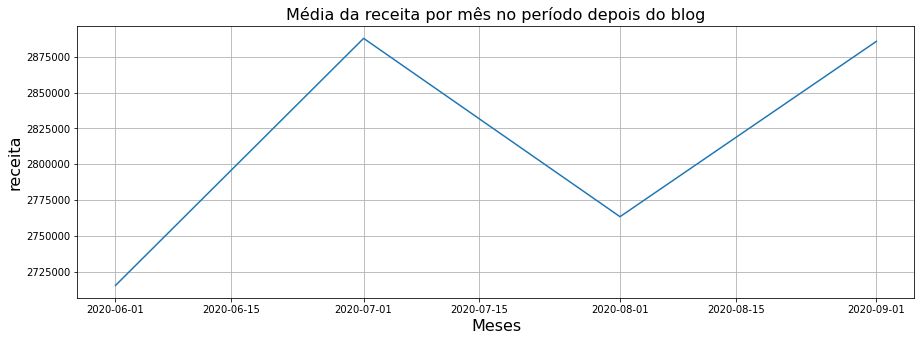

In [ ]:
#grafico receita no período depois do blog
plt.figure(figsize=(15,5))
plt.plot(df_depois_blog.groupby(['ano_mes'])['receita'].agg(['mean']))

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.title('Média da receita por mês no período depois do blog', fontsize = 16)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)

**Comparando as médias das receitas antes e depois do blog**

In [ ]:
#média antes do blog

df_antes_blog['receita'].mean()

2091752.3238636365

In [ ]:
# media depois blog
df_depois_blog['receita'].mean()

2811256.1623931625

In [ ]:
# taxa de crescimento
percentual_crescimento = ((df_depois_blog['receita'].mean()) - df_antes_blog['receita'].mean()) / (df_antes_blog['receita'].mean()) * 100
percentual_crescimento

34.39718126859991

**Comportamento da receita:**



*   Houve um aumento de 34% após a chegada do blog (contando com as fontes blog e site);
*   Como a receita já vinha crescendo antes, quando só existia o site, não dá pra afirmar com tanta certeza, ainda, se esse crescimento foi decorrente do site ou do blog.





**TESTE DE HIPÓTESE**

In [ ]:
# Realizar o teste de hipótese
alpha = 0.05  # nível de significância
stat, p = stats.ttest_ind(df_antes_blog['receita'], df_depois_blog['receita'], equal_var=False) #assumindo que não há igualdade de variâncias entre as amostras
if p < alpha:
    print("Rejeita H0: As médias das receitas são diferentes antes e depois do lançamento do blog.")
else:
    print("Aceita H0: Não há diferença significativa entre as médias das receitas antes e depois do lançamento do blog.")

Rejeita H0: As médias das receitas são diferentes antes e depois do lançamento do blog.


**ANÁLISE DE ESTACIONARIEDADE (TRIMESTRAL) DO PERÍODO ANTES DO BLOG**





In [ ]:
# Obtendo a média de receita trimestral período antes do blog
df_antes_blog.index = pd.to_datetime(df_antes_blog.data)
trimestral_antes_blog = df_antes_blog['receita'].resample('Q').mean()
trimestral_antes_blog



data
2019-03-31    1.882328e+06
2019-06-30    1.389248e+06
2019-09-30    1.600792e+06
2019-12-31    2.811198e+06
2020-03-31    1.701485e+06
2020-06-30    2.092005e+06
Freq: Q-DEC, Name: receita, dtype: float64

In [ ]:
# Obtendo o somatório de receita trimestral período antes do blog
df_antes_blog.index = pd.to_datetime(df_antes_blog.data)
trimestral_antes_blog = df_antes_blog['receita'].resample('Q').sum()
trimestral_antes_blog

data
2019-03-31     35764225
2019-06-30      4167745
2019-09-30     41620598
2019-12-31    120881504
2020-03-31     52746048
2020-06-30    112968289
Freq: Q-DEC, Name: receita, dtype: int64

In [ ]:

#média da receita por trimestre
trimestral_antes_blog.mean()

61358068.166666664

**ANÁLISE DE ESTACIONARIEDADE (TRIMESTRAL) DO PERÍODO DEPOIS DO BLOG**

In [ ]:

#média trimestral depois do blog

df_depois_blog.index = pd.to_datetime(df_depois_blog.data)
trimestral_depois_blog = df_depois_blog['receita'].resample('3M').mean()
trimestral_depois_blog.mean()

2779808.6413793107

In [ ]:
#somatório da receita trimestral período pós blog

df_depois_blog.index = pd.to_datetime(df_depois_blog.data)
trimestral_depois_blog = df_depois_blog['receita'].resample('3M').sum()
trimestral_depois_blog

data
2020-06-30     81457754
2020-09-30    247459217
Freq: 3M, Name: receita, dtype: int64

In [ ]:
# media da receita por trimestre
trimestral_depois_blog.mean()

164458485.5



*   Antes do blog, a receita era em média 61.358.068,16 por trimestre;
*   Depois do blog, a receita passou a ser em média 164.458.485,5 por trimestre


**ANÁLISE DE TENDÊNCIA TRIMESTRAL**

1. **Antes do blog**

In [ ]:
# Obtendo a janela móvel (3 meses)
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)
rolling_mean = df_antes_blog['receita'].rolling(window=indexer, min_periods=3).mean()
rolling_mean = rolling_mean.shift(3)
rolling_mean



data
2019-02-14             NaN
2019-03-01             NaN
2019-03-06             NaN
2019-03-07    1.572919e+06
2019-03-08    1.751870e+06
                  ...     
2020-05-27    1.738726e+06
2020-05-28    2.226789e+06
2020-05-29    2.555936e+06
2020-05-30    2.768425e+06
2020-05-31    2.525472e+06
Name: receita, Length: 176, dtype: float64

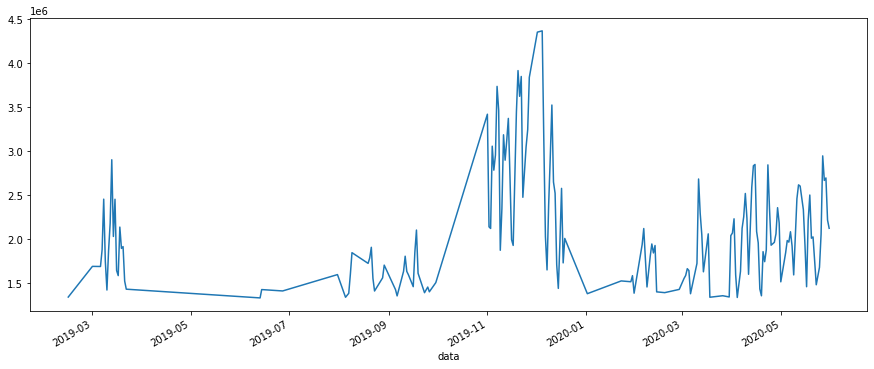

In [ ]:
#plotando a receita

df_antes_blog['receita'].plot(figsize=(15,6))

2. **DEPOIS DO BLOG**

In [ ]:
# Obtendo a janela móvel (3 meses)
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)
rolling_mean = df_depois_blog['receita'].rolling(window=indexer, min_periods=3).mean()
rolling_mean = rolling_mean.shift(3)
rolling_mean

data
2020-06-01             NaN
2020-06-02             NaN
2020-06-03             NaN
2020-06-04    2.393924e+06
2020-06-05    2.491016e+06
                  ...     
2020-09-24    3.232131e+06
2020-09-25    3.635697e+06
2020-09-26    3.658762e+06
2020-09-27    3.159488e+06
2020-09-28    2.670800e+06
Name: receita, Length: 117, dtype: float64

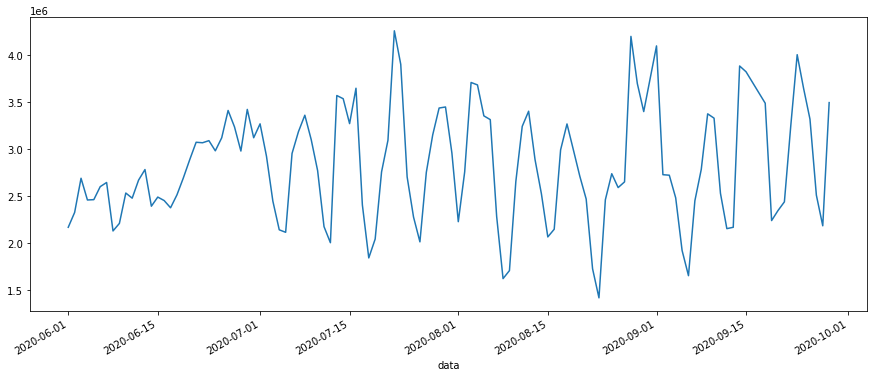

In [ ]:
# plotando a receita
df_depois_blog['receita'].plot(figsize=(15,6))

**ANÁLISE DE SAZONALIDADE**

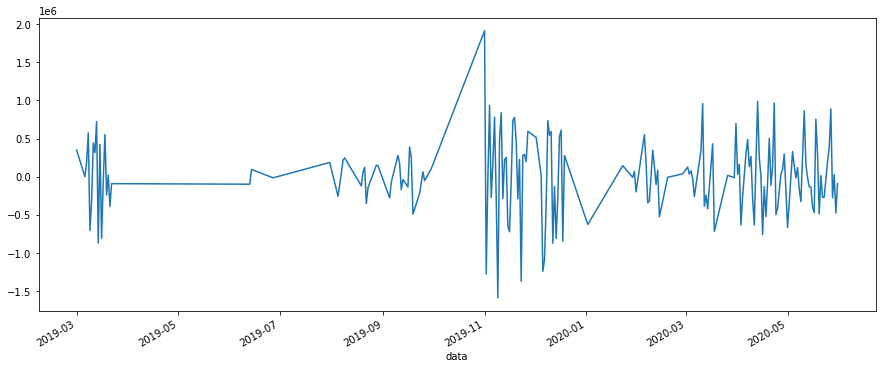

In [ ]:
# antes blog
df_antes_blog['receita'].diff().plot(figsize=(15,6))

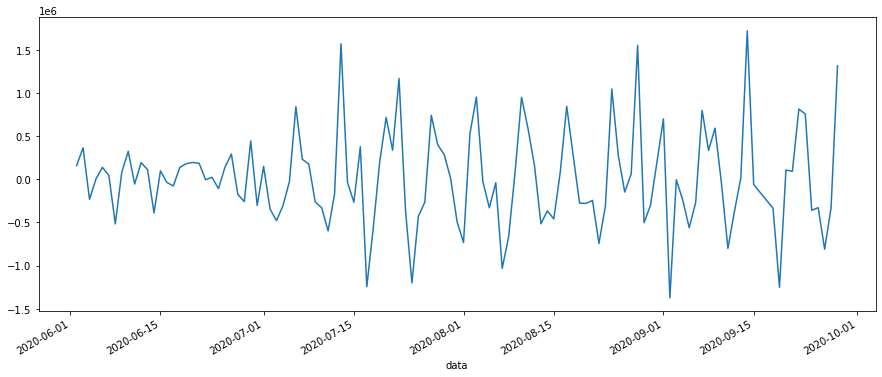

In [ ]:
# depois blog
df_depois_blog['receita'].diff().plot(figsize=(15,6))

**ANÁLISE DE TENDÊNCIA (12 MESES)**

In [ ]:
#função para plotar a média móvel de 12 meses  no período antes do blog

def plot_mediamovel(timeseries):
  rolmean = timeseries.rolling(12).mean()
  plt.figure(figsize=(15,6))
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolmean, color= 'red', label='Média móvel 12 meses antes do blog')
  plt.legend(loc='best')
  plt.title('valor original e média móvel dos 12 meses')
  plt.show(block=False)







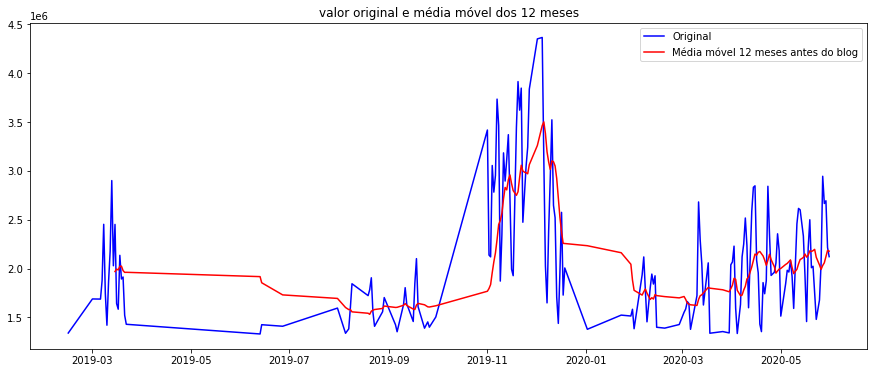

In [ ]:
plot_mediamovel(df_antes_blog['receita'])

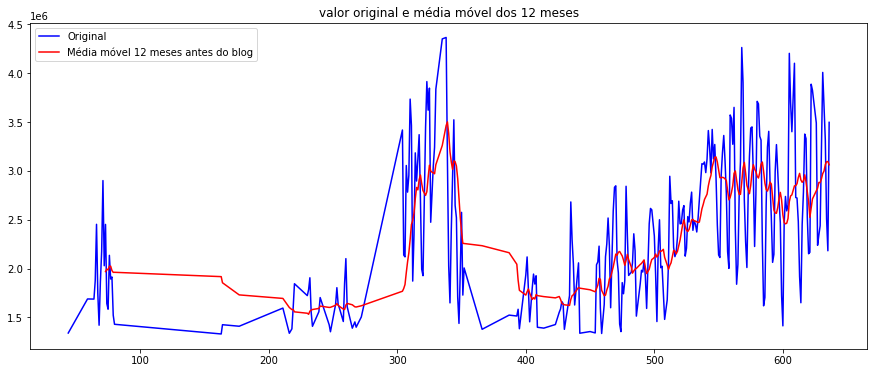

In [ ]:
plot_mediamovel(df_sem_outlier['receita'])

In [ ]:
#df_antes_blog.columns

In [ ]:
# Converter a coluna de data em um índice de data
#df_antes_blog['ano_mes'] = pd.to_datetime(df_antes_blog['ano_mes'])
#df_antes_blog.set_index('data', inplace=True)


In [ ]:
#df_antes_blog['data'] 

In [ ]:
#help(seasonal_decompose)

In [ ]:
# Decompor a série temporal em suas componentes tendência, sazonalidade e ruído
#resultado = seasonal_decompose(df_['receita'] , model='multiplicative')

In [ ]:
# Plotando a tendência
'''
plt.plot(result.trend)
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.title("Tendência das Vendas")
plt.show()

**COMPARANDO O NÚMERO DE TRANSAÇÕES E O NÚMERO DE USUÁRIOS DO SITE E DO BLOG**


Text(0, 0.5, 'receita')

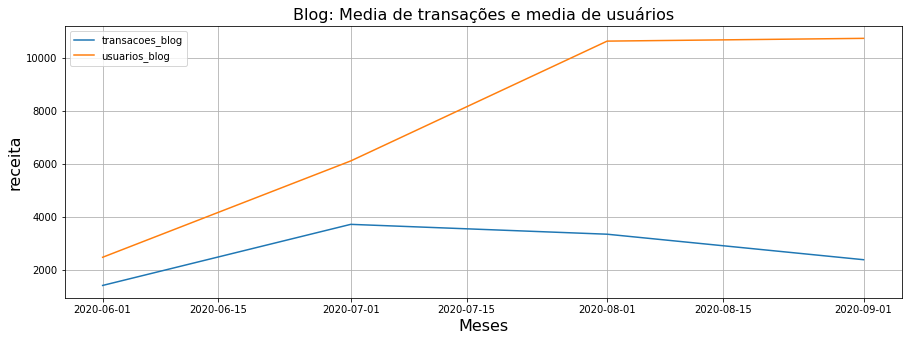

In [ ]:
# Transacoes do blog no tempo
plt.figure(figsize=(15,5))
plt.plot( df_depois_blog.groupby(['ano_mes'])['transacoes_blog'].agg(['mean']), label='transacoes_blog')
plt.plot( df_depois_blog.groupby(['ano_mes'])['usuarios_blog'].agg(['mean']), label='usuarios_blog')

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.legend()
plt.title('Blog: Media de transações e media de usuários', fontsize = 16)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)


* O numero de usuarios do blog aumentou, mas a quantidade de transacoes diminuiu, o que eh um tanto curioso, ja que, naturalmente, deveria haver uma correlacao entre a quantidade de usarios no blog e as transacoes. 
* Seria interessante comunicar a equipe responsavel pelo blog, para entender o que houve a partir do mes 07 de 2020 pra gerar essa quebra de correlacao 

Text(0, 0.5, 'receita')

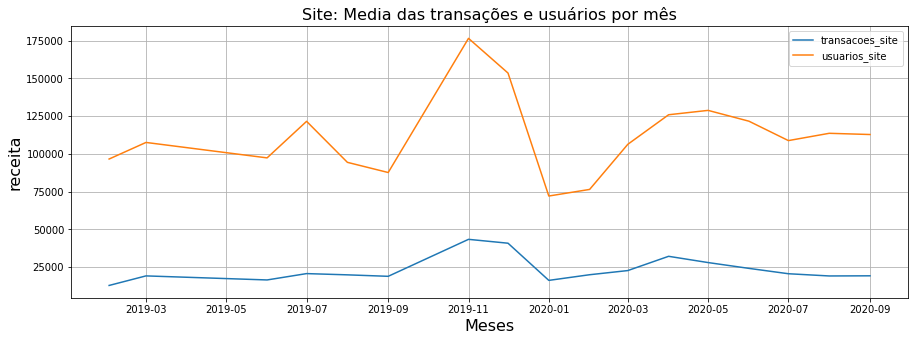

In [ ]:
# Transacoes do site no tempo
plt.figure(figsize=(15,5))
plt.plot(df_sem_outlier.groupby(['ano_mes'])['transacoes_site'].agg(['mean']), label='transacoes_site')
plt.plot(df_sem_outlier.groupby(['ano_mes'])['usuarios_site'].agg(['mean']), label='usuarios_site')

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.legend()
plt.title('Site: Media das transações e usuários por mês', fontsize = 16)
plt.xlabel('Meses', fontsize = 16)
plt.ylabel('receita', fontsize = 16)

In [ ]:
#df_sem_outlier = df_sem_outlier_site[ (df_sem_outlier_site.data >= '2019-01-01') & (df_sem_outlier_site.data <= '2019-09-01')]
#df_sem_outlier_site

**SEPARANDO OS DATAFRAMES SITE E BLOG**

In [ ]:
#Obtendo apenas o dataframe do site

df_sem_outlier_site = df_sem_outlier[df_sem_outlier.transacoes_blog == 0]
df_sem_outlier_site

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,ano_mes
44,2019-02-14,1340918,0,12798,0,96579,2019-02-01
59,2019-03-01,1689589,0,15577,0,97690,2019-03-01
64,2019-03-06,1688251,0,16212,0,105136,2019-03-01
65,2019-03-07,1877771,0,17793,0,108032,2019-03-01
66,2019-03-08,2453247,0,24376,0,109411,2019-03-01
...,...,...,...,...,...,...,...
512,2020-05-27,2944816,0,32761,0,141234,2020-05-01
513,2020-05-28,2666364,0,31111,0,144696,2020-05-01
514,2020-05-29,2694096,0,32421,0,122685,2020-05-01
515,2020-05-30,2215956,0,25632,0,112932,2020-05-01


In [ ]:
# obtendo apenas o dataframe do blog
df_sem_outlier_blog = df_sem_outlier[df_sem_outlier.transacoes_blog > 0]
df_sem_outlier_blog

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,ano_mes
517,2020-06-01,2166784,301,29095,856,131209,2020-06-01
518,2020-06-02,2325207,458,31840,697,157032,2020-06-01
519,2020-06-03,2689781,435,33739,521,142649,2020-06-01
520,2020-06-04,2458059,599,33464,1449,153545,2020-06-01
521,2020-06-05,2461542,870,28136,1066,136153,2020-06-01
...,...,...,...,...,...,...,...
632,2020-09-24,3648743,2379,22807,11700,130853,2020-09-01
633,2020-09-25,3320034,1996,21578,10082,112163,2020-09-01
634,2020-09-26,2509687,1580,15320,9292,96178,2020-09-01
635,2020-09-27,2182679,1838,14135,10052,103494,2020-09-01


**OBTENDO O VALOR DE CADA TRANSAÇÃO**

In [ ]:
# Descobrir a quantidade de receita para cada transacao do site
df_sem_outlier_site = df_antes_blog  # df_site[ (df_site.data >= '2019-01-01') & (df_site.data <= '2019-09-01')]

media_receita_site = df_sem_outlier_site.receita.mean()
print(f'media_receita_site: {media_receita_site}')

media_transacoes_site = df_sem_outlier_site.transacoes_site.mean()  # sum = 2953738 e count = 244
print(f'media_transacoes_site: {media_transacoes_site}')

# quantidade de receita por transacao
receita_por_transacao = media_receita_site/media_transacoes_site
print(f'quantidade de receita por transacao: {receita_por_transacao:.2f}')

media_receita_site: 2091752.3238636365
media_transacoes_site: 28371.517045454544
quantidade de receita por transacao: 73.73


In [ ]:
# Descobrir a quantidade de receita para cada transacao do blog

'''
EM ANDAMENTO (UTILIZAR O MESMO PROCESSO ANTERIOR PARA OBTER O VALOR POR TRANSAÇÃO DO BLOG)
df_sem_outlier_site = df_antes_blog  # df_site[ (df_site.data >= '2019-01-01') & (df_site.data <= '2019-09-01')]


media_receita_site = df_sem_outlier_site.receita.mean()
print(f'media_receita_site: {media_receita_site}')

media_transacoes_site = df_sem_outlier_site.transacoes_site.mean()  # sum = 2953738 e count = 244
print(f'media_transacoes_site: {media_transacoes_site}')

# quantidade de receita por transacao
receita_por_transacao = media_receita_site/media_transacoes_site
print(f'quantidade de receita por transacao: {receita_por_transacao:.2f}')
'''


In [ ]:
#2953738 / 244

1. **Comparando as receitas blog x site**

In [ ]:
# definir a função lambda para zerar a coluna 'receita'
def zerar_receita(date):
    if date < pd.to_datetime('2020-06-01'):
        return 0
    else:
        return 1

# aplicar a função para a coluna 'receita'
df_sem_outlier_site['receita_blog'] = df_sem_outlier_site.apply(lambda row: row['receita_blog'] * zerar_receita(row['data']), axis=1)


<ipython-input-61-897bee85bce1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outlier_site['receita_blog'] = df_sem_outlier_site.apply(lambda row: row['receita_blog'] * zerar_receita(row['data']), axis=1)


<ipython-input-84-2ef22c470689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outlier['receita_site'] = df_sem_outlier.transacoes_site * 73.73
<ipython-input-84-2ef22c470689>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outlier['receita_blog'] = df_sem_outlier.receita - df_sem_outlier.receita_site
<ipython-input-84-2ef22c470689>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Text(0, 0.5, 'receita')

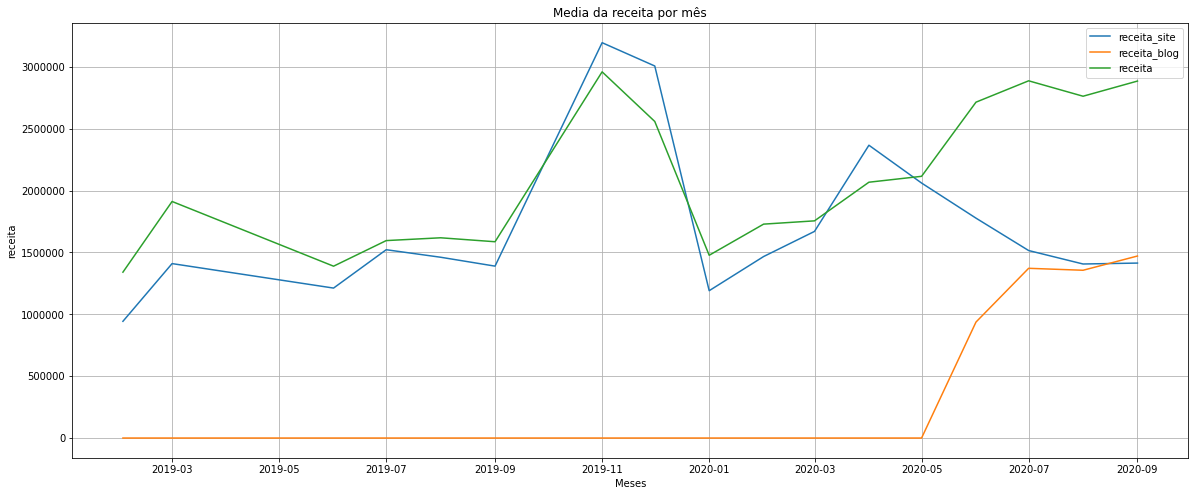

In [ ]:

#Cálculo para se obter o valor por transação do blog e do site
df_sem_outlier['receita_site'] = df_sem_outlier.transacoes_site * 73.73
df_sem_outlier['receita_blog'] = df_sem_outlier.receita - df_sem_outlier.receita_site

# zera receita blog antes de sua existencia (inferencia)
df_sem_outlier['receita_blog'] = df_sem_outlier.apply(lambda row: row['receita_blog'] * zerar_receita(row['data']), axis=1)

# plota a receita total, receita do blog e receita do site
plt.figure(figsize=(20,8))
plt.plot( df_sem_outlier.groupby(['ano_mes'])['receita_site'].agg(['mean']), label='receita_site')
plt.plot( df_sem_outlier.groupby(['ano_mes'])['receita_blog'].agg(['mean']), label='receita_blog')
plt.plot( df_sem_outlier.groupby(['ano_mes'])['receita'].agg(['mean']), label='receita')

plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.legend()
plt.title('Media da receita por mês')
plt.xlabel('Meses')
plt.ylabel('receita')

**Comportamento das receitas no tempo**
*  No período do blog, a receita do site teve uma queda, porém,
a receita total continuou aumentando, o que é surpreendente, já que o site conta com mais transações do que o blog, considerando a correlação transação e receitA; 

*  A receita do blog acompanhou o crescimento da receita total durante o período de queda (entre junho e novembro). Ou seja, no período de queda do site, o blog foi a fonte que mais contribuiu com a receita total da empresa;

*  O site estava seguindo em crescimento, porém, justamente no período do lançamento do blog, houve uma queda;

* Perguntas: 
    - Quais estavam sendo as ações estratégicas antes do blog, que estavam fazendo o site crescer?
    - Houve alguma mudança nessas estratégias após o período do blog? 
    - Houve alguma mudança no fluxo de usuários do site? Eles passaram a acessar mais o blog e realizar transações por lá?

**TAXA DE CONVERSÃO BLOG X SITE**

In [ ]:
# calcular a taxa de conversão do blog e do site
df_sem_outlier['taxa_conversao_site'] = df_sem_outlier['transacoes_site'] / df_sem_outlier['usuarios_site']
df_sem_outlier['taxa_conversao_blog'] = df_sem_outlier['transacoes_blog'] / df_sem_outlier['usuarios_blog']

# exibir a taxa de conversão em porcentagem
print("Taxa de conversão do site: {:.2%}".format(df_sem_outlier['taxa_conversao_site'].mean()))
print("Taxa de conversão do blog: {:.2%}".format(df_sem_outlier['taxa_conversao_blog'].mean()))



Taxa de conversão do site: 21.09%
Taxa de conversão do blog: 44.60%


<ipython-input-97-19767405a677>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outlier['taxa_conversao_site'] = df_sem_outlier['transacoes_site'] / df_sem_outlier['usuarios_site']
<ipython-input-97-19767405a677>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outlier['taxa_conversao_blog'] = df_sem_outlier['transacoes_blog'] / df_sem_outlier['usuarios_blog']


* De acordo com os dados, o blog está convertendo mais vendas do que site



**CONCLUSÕES**

**TESTE DE HIPÓTESE:**
 As médias das receitas são diferentes antes e depois do lançamento do blog.



**COMPORTAMENTO DA RECEITA DO SITE ANTES DO BLOG**

* 	No período de 05/19, o site estava apresentando uma queda;

* 	Entre os messes 09 e 11, o site apresentou um pico de crescimento (blackfriday?);

* 	Houve uma queda na receita no mês de dezembro;

*   Em janeiro de 2020, a receita começou a subir até o mes de maio.




**COMPORTAMENTO DA RECEITA BLOG X SITE:**


* 	Houve um aumento de 34% na receita após a chegada do blog (contando com as fontes blog e site);

* 	Como a receita já vinha crescendo antes, quando só existia o site, não dá pra afirmar com tanta certeza, ainda, se esse crescimento foi decorrente do site ou do blog.

* 	Antes do blog, a receita era em média 61.358.068,16 por trimestre;

* 	Depois do blog, a receita passou a ser em média 164.458.485,5 por trimestre;

* 	No período do blog, a receita do site teve uma queda, porém, a receita total continuou aumentando, o que é surpreendente, já que o site conta com mais transações do que o blog, considerando a correlação transação e receitA;

* 	A receita do blog acompanhou o crescimento da receita total durante o período de queda (entre junho e novembro). Ou seja, no período de queda do site, o blog foi a fonte que mais contribuiu com a receita total da empresa;

*   O site estava seguindo em crescimento, porém, justamente no período do lançamento do blog, houve uma queda;

*	 Perguntas:
    -	Quais estavam sendo as ações estratégicas antes do blog, que estavam fazendo o site crescer?
    -	Houve alguma mudança nessas estratégias após o período do blog?
    -	Houve alguma mudança no fluxo de usuários do site? Eles passaram a acessar mais o blog e realizar transações por lá?



**COMPORTAMENTO DO NÚMERO DE USUÁRIOS E TRANSAÇÕES BLOG X SITE**


* 	O numero de usuarios do blog aumentou, mas a quantidade de transacoes diminuiu, o que eh um tanto curioso, ja que, naturalmente, deveria haver uma correlacao entre a quantidade de usarios no blog e as transacoes;

* 	Seria interessante comunicar a equipe responsavel pelo blog, para entender o que houve a partir do mes 07 de 2020 pra gerar essa quebra de correlacao.

**TAXA DE CONVERSÃO:**
* 	A taxa de conversão do site é 21,09%. Enquanto a taxa de conversão do blog é 44,06%
